In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dataframe_image as dfi
from datetime import datetime
import scipy
import itertools
import geopandas as gpd
import xarray as xr
import regionmask
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [111]:
data = pd.io.stata.read_stata(r"C:\Users\PcLaptop\Documents\GitHub\Climate-and-conflict\AJAE_MaystadtEcker.dta")

In [112]:
# show all elements in list data.columns
pd.set_option('display.max_columns', None)
data.head()

,new_province_id,ident_yrmth,yr_id,month_id,TA3_m50,TA1_m80,TA2_m80,TA3_m80,TA4_m80,TA5_m80,TA6_m80,TA3_a80,PA1_83,PA2_83,PA3_83,PA4_83,PA5_83,PA6_83,DL_TA3_m50,DL_TA1_m80,DL_TA2_m80,DL_TA3_m80,DL_TA4_m80,DL_TA5_m80,DL_TA6_m80,DL_TA3_a80,DL_PA1_83,DL_PA2_83,DL_PA3_83,DL_PA4_83,DL_PA5_83,DL_PA6_83,TA3_a97,PA3_97,DL_TA3_a97,DL_PA3_97,tot_violent_mth,tot_conflict_mth,tot_ucdp_mth,lwage,lprice_rice,lprice_whmaize,lprice_sorghum,lr_rat_price_camlo_petro,lr_rat_price_catlo_petro,lr_rat_price_catex_sugar,lr_rat_price_catex_rrice,lr_rat_price_catex_petro,lr_rat_price_goaex_petro,lr_rat_price_sheex_petro,newident_yrmth,rainy,x_coord,y_coord,Interdum1_1,Interdum2_1,Interdum3_1,Interdum4_1,Interdum5_1,Interdum6_1,Interdum7_1,Interdum8_1,Interdum9_1,Interdum10_1,Interdum11_1,Interdum12_1,Interdum13_1,Interdum14_1,Interdum15_1,Interdum16_1,Interdum17_1,Interdum18_1,Interdum1_2,Interdum2_2,Interdum3_2,Interdum4_2,Interdum5_2,Interdum6_2,Interdum7_2,Interdum8_2,Interdum9_2,Interdum10_2,Interdum11_2,Interdum12_2,Interdum13_2,Interdum14_2,Interdum15_2,Interdum16_2,Interdum17_2,Interdum18_2,Interdum1_3,Interdum2_3,Interdum3_3,Interdum4_3,Interdum5_3,Interdum6_3,Interdum7_3,Interdum8_3,Interdum9_3,Interdum10_3,Interdum11_3,Interdum12_3,Interdum13_3,Interdum14_3,Interdum15_3,Interdum16_3,Interdum17_3,Interdum18_3,Interdum1_4,Interdum2_4,Interdum3_4,Interdum4_4,Interdum5_4,Interdum6_4,Interdum7_4,Interdum8_4,Interdum9_4,Interdum10_4,Interdum11_4,Interdum12_4,Interdum13_4,Interdum14_4,Interdum15_4,Interdum16_4,Interdum17_4,Interdum18_4,Interdum1_5,Interdum2_5,Interdum3_5,Interdum4_5,Interdum5_5,Interdum6_5,Interdum7_5,Interdum8_5,Interdum9_5,Interdum10_5,Interdum11_5,Interdum12_5,Interdum13_5,Interdum14_5,Interdum15_5,Interdum16_5,Interdum17_5,Interdum18_5,Interdum1_6,Interdum2_6,Interdum3_6,Interdum4_6,Interdum5_6,Interdum6_6,Interdum7_6,Interdum8_6,Interdum9_6,Interdum10_6,Interdum11_6,Interdum12_6,Interdum13_6,Interdum14_6,Interdum15_6,Interdum16_6,Interdum17_6,Interdum18_6,Interdum1_7,Interdum2_7,Interdum3_7,Interdum4_7,Interdum5_7,Interdum6_7,Interdum7_7,Interdum8_7,Interdum9_7,Interdum10_7,Interdum11_7,Interdum12_7,Interdum13_7,Interdum14_7,Interdum15_7,Interdum16_7,Interdum17_7,Interdum18_7,Interdum1_8,Interdum2_8,Interdum3_8,Interdum4_8,Interdum5_8,Interdum6_8,Interdum7_8,Interdum8_8,Interdum9_8,Interdum10_8,Interdum11_8,Interdum12_8,Interdum13_8,Interdum14_8,Interdum15_8,Interdum16_8,Interdum17_8,Interdum18_8,Interdum1_9,Interdum2_9,Interdum3_9,Interdum4_9,Interdum5_9,Interdum6_9,Interdum7_9,Interdum8_9,Interdum9_9,Interdum10_9,Interdum11_9,Interdum12_9,Interdum13_9,Interdum14_9,Interdum15_9,Interdum16_9,Interdum17_9,Interdum18_9,Interdum1_10,Interdum2_10,Interdum3_10,Interdum4_10,Interdum5_10,Interdum6_10,Interdum7_10,Interdum8_10,Interdum9_10,Interdum10_10,Interdum11_10,Interdum12_10,Interdum13_10,Interdum14_10,Interdum15_10,Interdum16_10,Interdum17_10,Interdum18_10,Interdum1_11,Interdum2_11,Interdum3_11,Interdum4_11,Interdum5_11,Interdum6_11,Interdum7_11,Interdum8_11,Interdum9_11,Interdum10_11,Interdum11_11,Interdum12_11,Interdum13_11,Interdum14_11,Interdum15_11,Interdum16_11,Interdum17_11,Interdum18_11,Interdum1_12,Interdum2_12,Interdum3_12,Interdum4_12,Interdum5_12,Interdum6_12,Interdum7_12,Interdum8_12,Interdum9_12,Interdum10_12,Interdum11_12,Interdum12_12,Interdum13_12,Interdum14_12,Interdum15_12,Interdum16_12,Interdum17_12,Interdum18_12,DL_TAPA3_m83,lprice_ymaize1,lratio_catlo_missing,lratio_goaex_missing,lratio_sheex_missing,lratio_camlo_missing,lratio_sugar_missing,lratio_rrice_missing,med_pastoralist,med_agro,farming,w2x_TA3_m80,w2x_DL_TA3_m80,_merge
0,1.0,1.0,1997.0,1.0,0.084268,0.591737,0.575447,0.130345,0.206795,0.294938,0.234438,-0.308292,0.491739,-0.487116,-0.629830,-0.681562,-0.676749,-0.475928,5,2,1,5,4,3,2,0,0,5,4,4,4,3,0.451248,0.049672,1.0,0.0,0.0,0.0,0.0,9.375854,7.301822,6.684612,6.629363,4.725798,4.605170,6.006503,6.113211,5.146301,2.911054,NaN,25.0,0.0,48.292454,11.750271,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [113]:
#data.sort_values(by=['yr_id', 'month_id'], inplace=True)

In [114]:
path = r"C:\Users\PcLaptop\Documents\GitHub\Climate-and-conflict\Datasets\som_adm_ocha_itos_20230308_shp\som_admbnda_adm1_ocha_20230308.shp"
states_gdf = gpd.read_file(path) 

In [115]:
def get_aoi(shp, world=True):
    lon_lat = {}
    # Get lat min, max
    aoi_lat = [float(shp.total_bounds[1]), float(shp.total_bounds[3])]
    aoi_lon = [float(shp.total_bounds[0]), float(shp.total_bounds[2])]

    lon_lat["lon"] = aoi_lon
    lon_lat["lat"] = aoi_lat
    return lon_lat

bounds = get_aoi(states_gdf)

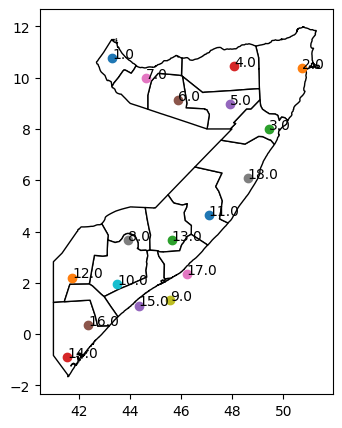

In [116]:
regx= data.groupby('new_province_id')['x_coord'].mean()
regy= data.groupby('new_province_id')['y_coord'].mean()
dic = dict(zip(regx.index, zip(regx, regy)))

fig, ax = plt.subplots(figsize=(5,5))
states_gdf.plot(ax=ax, color='white', edgecolor='black')
for i in dic:
    plt.scatter(dic[i][0]-5, dic[i][1]-1, label=i)
    plt.annotate(i, (dic[i][0]-5, dic[i][1]-1))

In [117]:
replacement_dict = {1  :  'Awdal',
8    :         'Bakool',
9      :       'Banadir',
2      :         'Bari',
10       :         'Bay',
11        :  'Galgaduud',
12          :      'Gedo',
13          :   'Hiraan',
14   :       'Lower_Juba',
15  :   'Lower_Shabelle',
16  :      'Middle_Juba',
17   : 'Middle_Shabelle',
18    :          'Mudug',
3    :        'Nugaal',
4      :       'Sanaag',
5       :        'Sool',
6        :   'Togdheer',
7   : 'Woqooyi_Galbeed'}

data['region'] = data['new_province_id'].replace(replacement_dict)

C:\Users\PcLaptop\AppData\Local\Temp\ipykernel_15612\163660781.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['region'] = data['new_province_id'].replace(replacement_dict)


In [118]:
#one for each country
df_dummies = pd.get_dummies(data['region'])
data = data.join(df_dummies)

data['month'] = data['month_id'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'})
df_dummies_m = pd.get_dummies(data['month'])
data = data.join(df_dummies_m)
data = data.replace({True: 1, False: 0})

C:\Users\PcLaptop\AppData\Local\Temp\ipykernel_15612\2066508838.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['month'] = data['month_id'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'})


In [119]:
data['newident_yrmth'] = data['newident_yrmth'].astype(int).astype(str)
data['newident_yrmth'] = data['newident_yrmth'].apply(lambda x: '_Inewident_'+str(x))

In [120]:
df_dummies_new = pd.get_dummies(data['newident_yrmth'].astype(str), drop_first=True)
df_dummies_new = df_dummies_new.replace({True: 1, False: 0})

In [121]:
#add a constant column to df_dummies_new
df_dummies_new['const'] = np.ones(len(df_dummies_new))

model = sm.OLS(data['tot_violent_mth'], df_dummies_new).fit()
data['res_tot_violent_mth'] = model.resid

model1 = sm.OLS(data['TA3_m80'], df_dummies_new).fit()
data['res_TA3_m80'] = model1.resid

model2 = sm.OLS(data['PA3_83'], df_dummies_new).fit()
data['res_PA3_83'] = model2.resid

model3 = sm.OLS(data['DL_TA3_m80'], df_dummies_new).fit()
data['res_DL_TA3_m80'] = model3.resid

In [122]:
y_var_name = 'res_tot_violent_mth'
X_var_names = ['res_TA3_m80','res_PA3_83','res_DL_TA3_m80']

In [123]:
# Regression expression for OLS with dummies

unit_names_mr = (data['new_province_id'].astype(int).astype(str) +'_'+ data['month_id'].astype(int).astype(str)).unique().tolist()

lsdv_expr = y_var_name + ' ~ '
i = 0
for X_var_name in X_var_names:
    if i > 0:
        lsdv_expr = lsdv_expr + ' + ' + X_var_name
    else:
        lsdv_expr = lsdv_expr + X_var_name
    i = i + 1

for dummy_name_mr in unit_names_mr:
    lsdv_expr = lsdv_expr + ' + ' + 'Interdum' + dummy_name_mr

#lsdv_expr = lsdv_expr + ' - ' + '1'

print('Regression expression for OLS with dummies=' + lsdv_expr)

Regression expression for OLS with dummies=res_tot_violent_mth ~ res_TA3_m80 + res_PA3_83 + res_DL_TA3_m80 + Interdum1_1 + Interdum1_2 + Interdum1_3 + Interdum1_4 + Interdum1_5 + Interdum1_6 + Interdum1_7 + Interdum1_8 + Interdum1_9 + Interdum1_10 + Interdum1_11 + Interdum1_12 + Interdum2_1 + Interdum2_2 + Interdum2_3 + Interdum2_4 + Interdum2_5 + Interdum2_6 + Interdum2_7 + Interdum2_8 + Interdum2_9 + Interdum2_10 + Interdum2_11 + Interdum2_12 + Interdum3_1 + Interdum3_2 + Interdum3_3 + Interdum3_4 + Interdum3_5 + Interdum3_6 + Interdum3_7 + Interdum3_8 + Interdum3_9 + Interdum3_10 + Interdum3_11 + Interdum3_12 + Interdum4_1 + Interdum4_2 + Interdum4_3 + Interdum4_4 + Interdum4_5 + Interdum4_6 + Interdum4_7 + Interdum4_8 + Interdum4_9 + Interdum4_10 + Interdum4_11 + Interdum4_12 + Interdum5_1 + Interdum5_2 + Interdum5_3 + Interdum5_4 + Interdum5_5 + Interdum5_6 + Interdum5_7 + Interdum5_8 + Interdum5_9 + Interdum5_10 + Interdum5_11 + Interdum5_12 + Interdum6_1 + Interdum6_2 + Interdum

In [124]:
lsdv_model = smf.ols(formula=lsdv_expr, data=data)
lsdv_model_results = lsdv_model.fit()
print(lsdv_model_results.summary())

                             OLS Regression Results                            
Dep. Variable:     res_tot_violent_mth   R-squared:                       0.374
Model:                             OLS   Adj. R-squared:                  0.321
Method:                  Least Squares   F-statistic:                     7.090
Date:                 Tue, 12 Sep 2023   Prob (F-statistic):          4.36e-146
Time:                         15:55:37   Log-Likelihood:                -7696.6
No. Observations:                 2808   AIC:                         1.583e+04
Df Residuals:                     2589   BIC:                         1.713e+04
Df Model:                          218                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -8.465e-16      0.0

In [125]:
lsdv_model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     res_tot_violent_mth   R-squared:                       0.374
Model:                             OLS   Adj. R-squared:                  0.321
Method:                  Least Squares   F-statistic:                     7.090
Date:                 Tue, 12 Sep 2023   Prob (F-statistic):          4.36e-146
Time:                         15:55:37   Log-Likelihood:                -7696.6
No. Observations:                 2808   AIC:                         1.583e+04
Df Residuals:                     2589   BIC:                         1.713e+04
Df Model:                          218                                         
Covariance Type:             nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -8.465e-16      0.073  -1.15e-14      1.000      -0.144       0.144
res_TA3_m80        0.7114      0.282      2.524      0.012       0.159       1.264
res_PA3_83        -0.4676      0.303     -1.543      0.123      -1.062       0.126
res_DL_TA3_m80     0.0767      0.019      3.978      0.000       0.039       0.114
Interdum1_1       -1.3404      1.085     -1.235      0.217      -3.468       0.787
Interdum1_2       -1.6278      1.085     -1.501      0.134      -3.755       0.499
Interdum1_3       -1.7637      1.084     -1.627      0.104      -3.889       0.362
Interdum1_4       -1.6422      1.085     -1.514      0.130      -3.769       0.484
Interdum1_5       -1.9190      1.085     -1.769      0.077      -4.046       0.208
Interdum1_6       -2.2774      1.083     -2.103      0.036      -4.401      -0.153
Interdum1_7       -1.9918      1.083     -1.840      0.066      -4.115       0.131
Interdum1_8       -1.6043      1.082     -1.483      0.138      -3.726       0.518
Interdum1_9       -1.4133      1.082     -1.307      0.191      -3.534       0.708
Interdum1_10      -1.4129      1.082     -1.306      0.192      -3.534       0.708
Interdum1_11      -1.2258      1.083     -1.132      0.258      -3.349       0.898
Interdum1_12      -1.3855      1.084     -1.279      0.201      -3.510       0.739
Interdum2_1       -0.7280      1.082     -0.673      0.501      -2.850       1.394
Interdum2_2       -0.6355      1.081     -0.588      0.557      -2.756       1.485
Interdum2_3       -0.6626      1.082     -0.613      0.540      -2.783       1.458
Interdum2_4       -0.6703      1.082     -0.619      0.536      -2.793       1.452
Interdum2_5       -0.5032      1.083     -0.464      0.642      -2.628       1.621
Interdum2_6       -1.3111      1.083     -1.211      0.226      -3.435       0.813
Interdum2_7       -1.1553      1.081     -1.068      0.286      -3.276       0.965
Interdum2_8       -0.5232      1.082     -0.484      0.629      -2.645       1.598
Interdum2_9       -0.7189      1.081     -0.665      0.506      -2.839       1.402
Interdum2_10      -0.2362      1.081     -0.218      0.827      -2.357       1.884
Interdum2_11      -0.8319      1.082     -0.769      0.442      -2.954       1.291
Interdum2_12      -0.3295      1.083     -0.304      0.761      -2.453       1.794
Interdum3_1       -0.5521      1.081     -0.511      0.610      -2.673       1.568
Interdum3_2       -0.6773      1.082     -0.626      0.532      -2.800       1.445
Interdum3_3       -0.7600      1.082     -0.702      0.483      -2.882       1.362
Interdum3_4       -0.7021      1.082     -0.649      0.516      -2.824       1.420
Interdum3_5       -0.9647      1.081     -0.892      0.372      -3.085       1.155
Interdum3_6       -1.1873      1.082     -1.097      0.273      -3.310       0.935
I